>1. TripType - a categorical id representing the type of shopping trip the customer made. This is the ground truth that you are predicting. TripType_999 is an "other" category. (Target)
1. VisitNumber - an id corresponding to a single trip by a single customer
1. Weekday - the weekday of the trip
1. Upc - the UPC number of the product purchased(바코드)
1. ScanCount - the number of the given item that was purchased. A negative value indicates a product return.(물건 수)
1. DepartmentDescription - a high-level description of the item's department
1. FinelineNumber - a more refined category for each of the products, created by Walmart (물건 카테고리)

In [1]:
%matplotlib inline
df = pd.read_csv("train.csv")

In [2]:
def weekday(x):
    if x == 'Monday': return 1
    elif x == 'Tuesday' : return 2
    elif x == 'Wednesday' : return 3
    elif x == 'Thursday' : return 4    
    elif x == 'Friday' : return 5
    elif x == 'Saturday' : return 6        
    elif x == 'Sunday' : return 7        

In [3]:
df['N_weekday'] = df['Weekday'].apply(weekday)

In [4]:
df.tail()

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber,N_weekday
647049,39,191346,Sunday,3.239000e+10,1,PHARMACY OTC,1118.0,7
647050,39,191346,Sunday,7.874205e+09,1,FROZEN FOODS,1752.0,7
647051,39,191346,Sunday,4.072000e+03,1,PRODUCE,4170.0,7
647052,8,191347,Sunday,4.190008e+09,1,DAIRY,1512.0,7
647053,8,191347,Sunday,3.800060e+09,1,GROCERY DRY GOODS,3600.0,7


In [5]:
df.describe()

,TripType,VisitNumber,Upc,ScanCount,FinelineNumber,N_weekday
count,647054.000000,647054.000000,6.429250e+05,647054.000000,642925.000000,647054.000000
mean,58.584511,96167.640078,3.060698e+10,1.108878,3726.884567,4.427787
std,157.635533,55545.485154,9.120134e+10,0.700776,2780.966158,2.073297
min,3.000000,5.000000,8.340000e+02,-12.000000,0.000000,1.000000
25%,27.000000,49268.000000,3.400001e+09,1.000000,1404.000000,3.000000
50%,39.000000,97074.000000,7.050103e+09,1.000000,3352.000000,5.000000
75%,40.000000,144316.000000,3.006531e+10,1.000000,5501.000000,6.000000
max,999.000000,191347.000000,9.789707e+11,71.000000,9998.000000,7.000000


# 1. Triptype

In [6]:
len(df['TripType'].unique()) # 3~ 40 + 999

38

In [7]:
mean = df[['TripType', 'N_weekday', 'VisitNumber']].groupby(['VisitNumber']).mean()

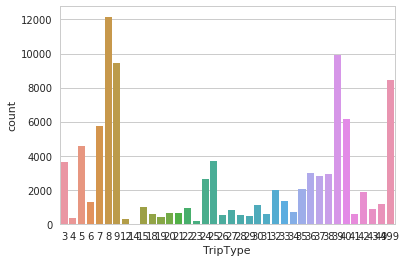

In [8]:
sns.countplot(mean['TripType']) # triptype별 고객 수

# 2. Weekday

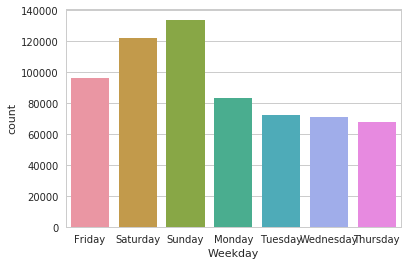

In [9]:
sns.countplot(df['Weekday']) # 요일별 상품 판매량+환불 처리량

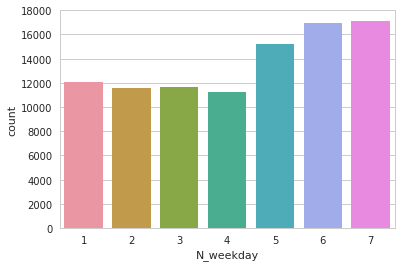

In [10]:
sns.countplot(mean['N_weekday']) # 요일별 '방문 고객' 수

# 3. Scan count

In [11]:
df['total'] = df['ScanCount'].apply(abs)
df['refund'] = df['ScanCount'].apply(lambda x: -x if x < 0 else 0)
df['purchase'] = df['ScanCount'].apply(lambda x: x if x > 0 else 0)
Sum = df[['total', 'refund', 'purchase', 'VisitNumber']].groupby(['VisitNumber']).sum() 

Sum.head(2) # 고객별 총계, 환불, 구매

,total,refund,purchase
VisitNumber,,,
5,1,1,0
7,2,0,2


In [12]:
Sum.describe()

,total,refund,purchase
count,95674.000000,95674.000000,95674.000000
mean,7.853628,0.177081,7.676547
std,10.256286,0.701180,10.234712
min,1.000000,0.000000,0.000000
25%,2.000000,0.000000,2.000000
50%,4.000000,0.000000,4.000000
75%,9.000000,0.000000,9.000000
max,315.000000,52.000000,313.000000


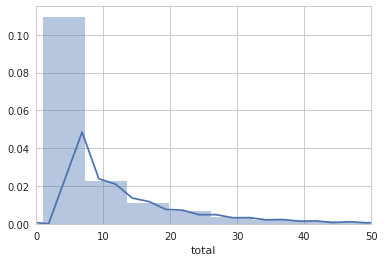

In [13]:
sns.distplot(Sum['total'])
plt.xlim(0, 50)
plt.show()

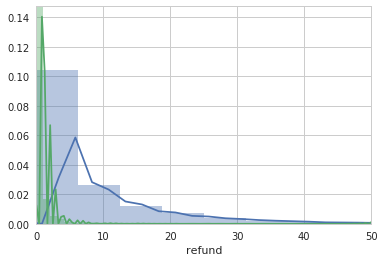

In [14]:
sns.distplot(Sum['purchase'])
sns.distplot(Sum['refund'])

plt.xlim(0, 50)
plt.xticks
plt.show()

## Upc, DepartmentDescription, FinelineNumber

## missing data
4129 row, 9619 value

In [15]:
missing = np.where(df.isnull())[0]
unq_mis = set(missing)
len(missing), len(unq_mis)

(9619, 4129)

In [16]:
unq_mis = list(unq_mis)
unq_mis.sort()
unq_mis[0]

25

In [17]:
df.loc[25]

TripType                     26
VisitNumber                   8
Weekday                  Friday
Upc                         NaN
ScanCount                     1
DepartmentDescription       NaN
FinelineNumber              NaN
N_weekday                     5
total                         1
refund                        0
purchase                      1
Name: 25, dtype: object

In [18]:
len(df['DepartmentDescription'].unique())

69

In [19]:
len(df['FinelineNumber'].unique())

5196

In [20]:
len(df['Upc'].unique())

97715

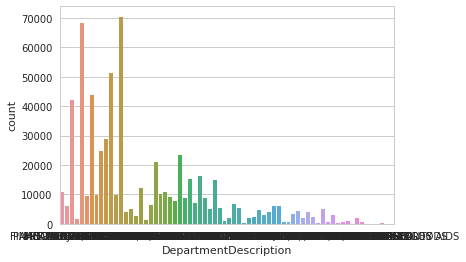

In [21]:
sns.countplot(df['DepartmentDescription']) # 상품별(69개) 판매+환불 처리량

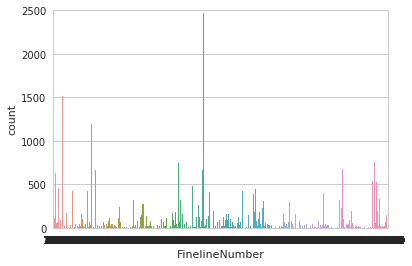

In [22]:
sns.countplot(df['FinelineNumber']) # 자세한 상품별(5196개) 판매+환불 처리량
plt.ylim(0, 2500)
plt.show()